# 1.라이브러리 및 데이터 로드

In [ ]:
import warnings;warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
train_path = "./data/train.csv"
test_path = "./data/test.csv"
subway_path = "./data/subway_feature.csv"
bus_path = "./data/bus_feature.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
subway_df= pd.read_csv(subway_path)
bus_df = pd.read_csv(bus_path)

In [ ]:
train_df['is_test'] = 0
test_df['is_test'] = 1
total_df = pd.concat([train_df, test_df])

In [ ]:
total_df['is_test'].value_counts()

is_test
0    1118822
1       9272
Name: count, dtype: int64

# 2.컬럼명 정리

In [ ]:
total_df = total_df.rename(columns={'전용면적(㎡)':'전용면적'})
total_df.columns = [col.replace('㎡', 'm').replace('k-','').replace('기타/의무/임대/임의=1/2/3/4','기타의무임대임의').replace('(아파트,주상복합등등)','').replace('(','_').replace(')','') for col in total_df.columns]

In [ ]:
total_df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지분류', '전화번호', '팩스번호',
       '단지소개기존clob', '세대타입_분양형태', '관리방식', '복도유형', '난방방식', '전체동수', '전체세대수',
       '건설사_시공사', '시행사', '사용검사일-사용승인일', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황_60m이하', '전용면적별세대현황_60m~85m이하', '85m~135m이하', '135m초과',
       '홈페이지', '등록일자', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타의무임대임의', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y',
       '단지신청일', 'target', 'is_test'],
      dtype='object')

# 3.위도, 경도 결측치 채우기

[https://www.findlatlng.org/](https://www.findlatlng.org/)  위도 경도 사이트로 크롤링, 결측치를 채워준다.

In [ ]:
with open('./data/new/coordinates.csv') as f:
    xydata = pd.read_csv(f)

In [ ]:
total_df['addr'] = total_df['시군구'] + ' ' + total_df['번지']

total_df = pd.merge(total_df, xydata, how = 'left', left_on = 'addr', right_on = 'addr')
total_df.drop(columns = ['좌표X','좌표Y'], inplace = True)
total_df.head(5)

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,기타의무임대임의,단지승인일,사용허가여부,관리비 업로드,단지신청일,target,is_test,addr,x,y
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,임의,2022-11-17 13:00:29.0,Y,N,2022-11-17 10:19:06.0,124000.0,0,서울특별시 강남구 개포동 658-1,127.057212,37.476156
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,2022-11-17 10:19:06.0,123500.0,0,서울특별시 강남구 개포동 658-1,127.057212,37.476156
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,임의,2022-11-17 13:00:29.0,Y,N,2022-11-17 10:19:06.0,91500.0,0,서울특별시 강남구 개포동 658-1,127.057212,37.476156
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,임의,2022-11-17 13:00:29.0,Y,N,2022-11-17 10:19:06.0,130000.0,0,서울특별시 강남구 개포동 658-1,127.057212,37.476156
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,임의,2022-11-17 13:00:29.0,Y,N,2022-11-17 10:19:06.0,117000.0,0,서울특별시 강남구 개포동 658-1,127.057212,37.476156


In [ ]:
total_df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지분류', '전화번호', '팩스번호',
       '단지소개기존clob', '세대타입_분양형태', '관리방식', '복도유형', '난방방식', '전체동수', '전체세대수',
       '건설사_시공사', '시행사', '사용검사일-사용승인일', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황_60m이하', '전용면적별세대현황_60m~85m이하', '85m~135m이하', '135m초과',
       '홈페이지', '등록일자', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타의무임대임의', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일',
       'target', 'is_test', 'addr', 'x', 'y'],
      dtype='object')

# 4.EDA

In [ ]:
display(total_df['거래유형'].value_counts())
display(total_df['등기신청일자'].value_counts())
display(total_df['중개사소재지'].value_counts())

거래유형
-       1086451
중개거래      38123
직거래        3520
Name: count, dtype: int64

등기신청일자
            1111271
20230630        585
20230831        496
20230428        394
20230731        374
             ...   
20230105          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: count, Length: 182, dtype: int64

중개사소재지
-                          1090013
서울 노원구                        2627
서울 송파구                        2540
서울 강남구                        2508
서울 강동구                        2038
                            ...   
부산 해운대구, 서울 강남구, 서울 용산구          1
경기 의정부시, 서울 영등포구                 1
서울 노원구, 서울 양천구                   1
광주 동구, 서울 노원구                    1
경기 연천군, 서울 송파구                   1
Name: count, Length: 739, dtype: int64

In [ ]:
total_df['거래유형'] = total_df['거래유형'].replace('-', np.nan)
total_df['등기신청일자'] = total_df['등기신청일자'].replace(' ', np.nan)
total_df['중개사소재지'] = total_df['중개사소재지'].replace('-', np.nan)

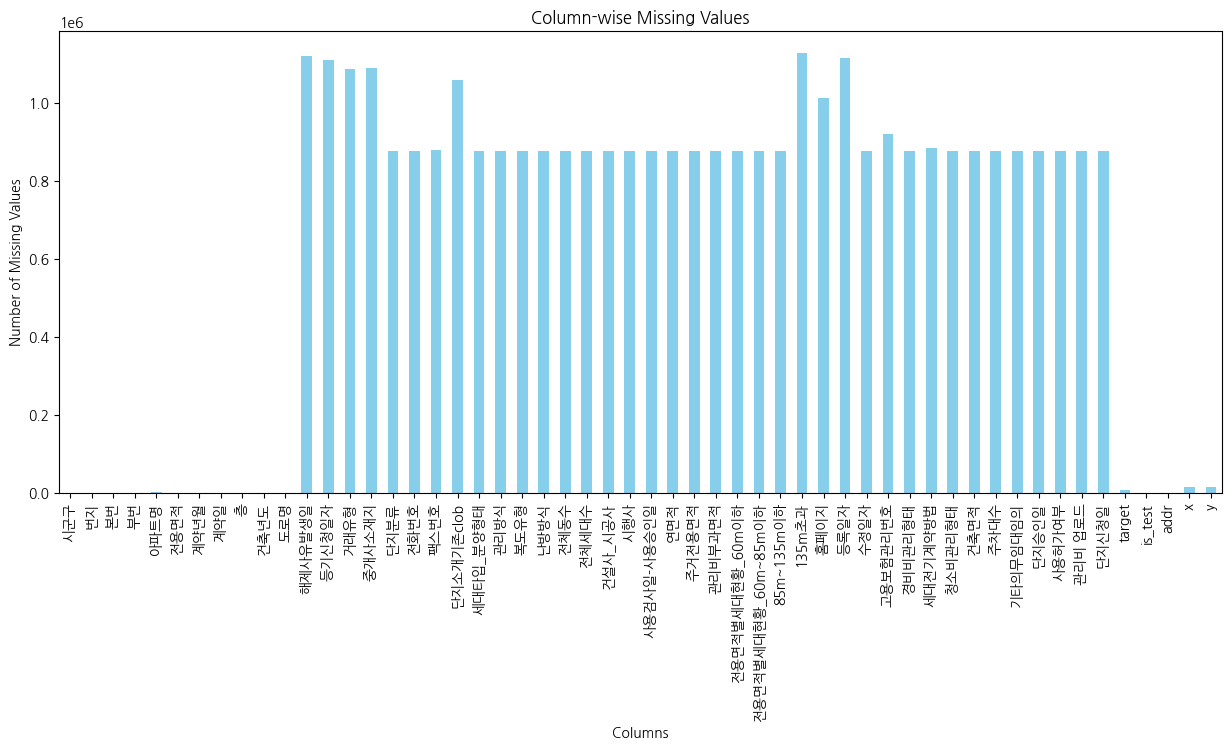

In [ ]:
# 컬럼별 결측치 수 계산
missing_values = total_df.isnull().sum()

# 그래프로 시각화
plt.figure(figsize=(15, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Column-wise Missing Values')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 54 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   시군구                  1128094 non-null  object 
 1   번지                   1127867 non-null  object 
 2   본번                   1128019 non-null  float64
 3   부번                   1128019 non-null  float64
 4   아파트명                 1125958 non-null  object 
 5   전용면적                 1128094 non-null  float64
 6   계약년월                 1128094 non-null  int64  
 7   계약일                  1128094 non-null  int64  
 8   층                    1128094 non-null  int64  
 9   건축년도                 1128094 non-null  int64  
 10  도로명                  1128094 non-null  object 
 11  해제사유발생일              6195 non-null     float64
 12  등기신청일자               16823 non-null    object 
 13  거래유형                 41643 non-null    object 
 14  중개사소재지               38081 non-null    object 
 15

## 4-1.상관행렬 분석 결과  
1. ```전체 동수```와 ```전체 세대수는``` 상관성이 대단히 높으며 ```연면적```, ```주거전용면적```, ```관리비부과면적```, ```전용면적별세대현황```, ```주차대수```들과도 상관관계를 보인다.
2. ```135m초과``` 컬럼은 어떤 변수들과도 관계가 없다.
3. ```target``` 즉, 부동산 가격은 ```전용면적```, ```계약년```, ```연면적```, ```주거전용면적```, ```관리비부과면적```들과 양의 상관관계, ```y좌표```와는 음의 상관관계를 갖는다.

y좌표와 target의 상관관계는 우연에 따라 발생한 것이라 추측

계약연도, 계약월 각각이 가격과 연관성이 있는지 확인하기 위해 분리.

In [ ]:
total_df['계약년월'].value_counts()

계약년월
202006    16364
201503    15510
201808    14990
201707    14922
201705    14766
          ...  
202207      690
202211      646
202209      620
202210      576
201609      460
Name: count, Length: 201, dtype: int64

In [ ]:
total_df['계약년월'] = total_df['계약년월'].astype(str)
total_df['계약년'] = total_df['계약년월'].str[:4].astype(int)
total_df['계약월'] = total_df['계약년월'].str[4:].astype(int)

<Axes: >

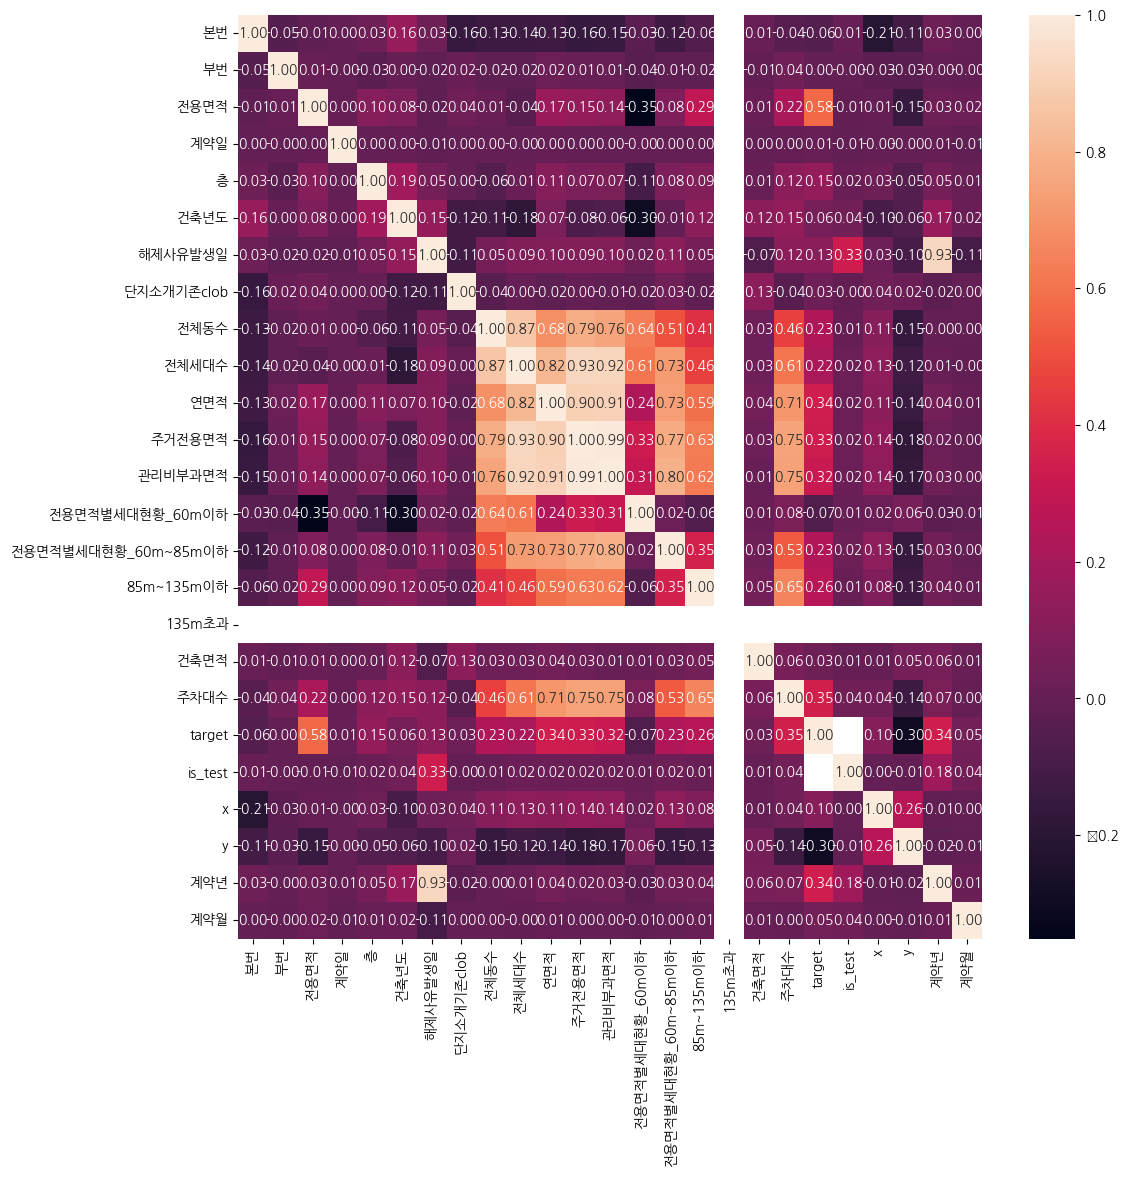

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data = total_df.corr(numeric_only=True), annot = True, fmt = '.2f')

## 4-3.전용면적과 target

분포를 확인해보면 
- 의외로 400m이 넘는 전용면적임에도 가격이 최고점이 아닌 것을 확인할 수 있으나 이는 다른 변수들과 target의 영향에 의한 것으로 판단.(거래 시점의 가격에 영향)  
- "전용면적이 넓을수록 가격이 높아진다."라는 상관성이 일반적인 경향이라고 해석.

0.5770410539849194


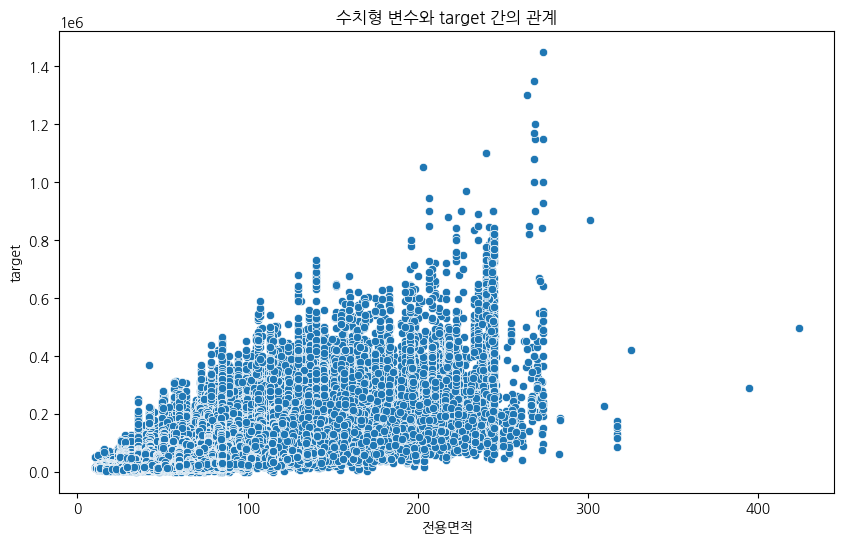

In [ ]:
corr_private_area = total_df['전용면적'].corr(total_df['target'])
print(corr_private_area)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='전용면적', y='target', data=total_df)
plt.title('수치형 변수와 target 간의 관계')
plt.show()

## 4-4.계약년월과 target
- 부동산을 판매하는 사람과 구매하는 사람간 거래가 성사된 날짜. 즉, 계약한 날짜.
- 플롯을보면 계약한 년월에 따라 변동폭이 매우 큰 것을 알 수 있다.

0.34466514441939844


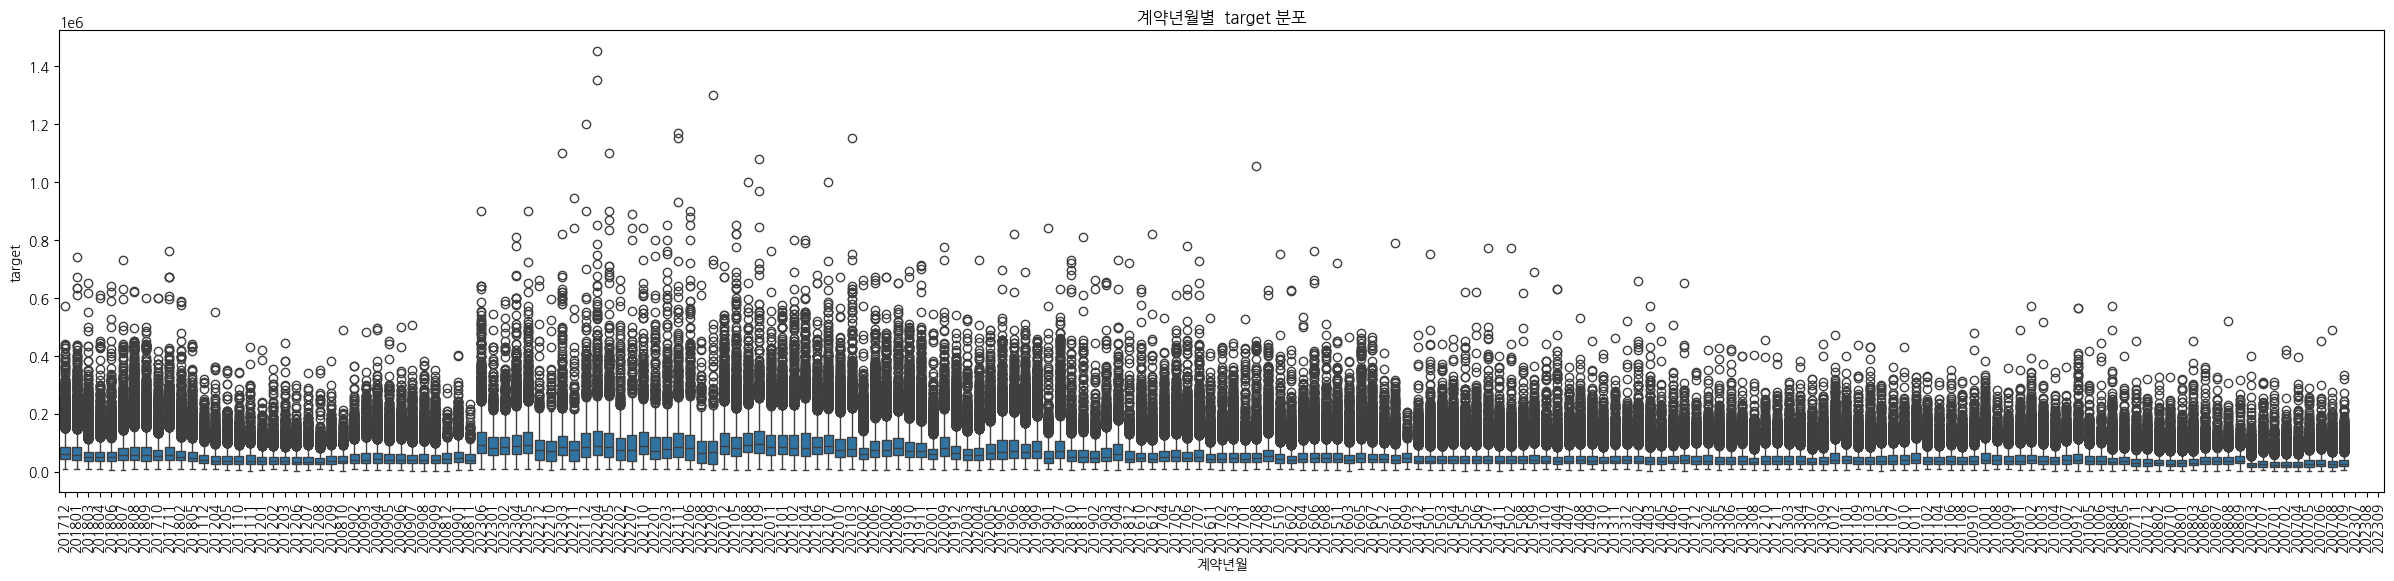

In [ ]:
corr_ym = total_df['계약년월'].corr(total_df['target'])
print(corr_ym)

plt.figure(figsize=(30, 6))
sns.boxplot(x='계약년월', y='target', data=total_df)
plt.xticks(rotation=90)
plt.title('계약년월별  target 분포')
plt.show()

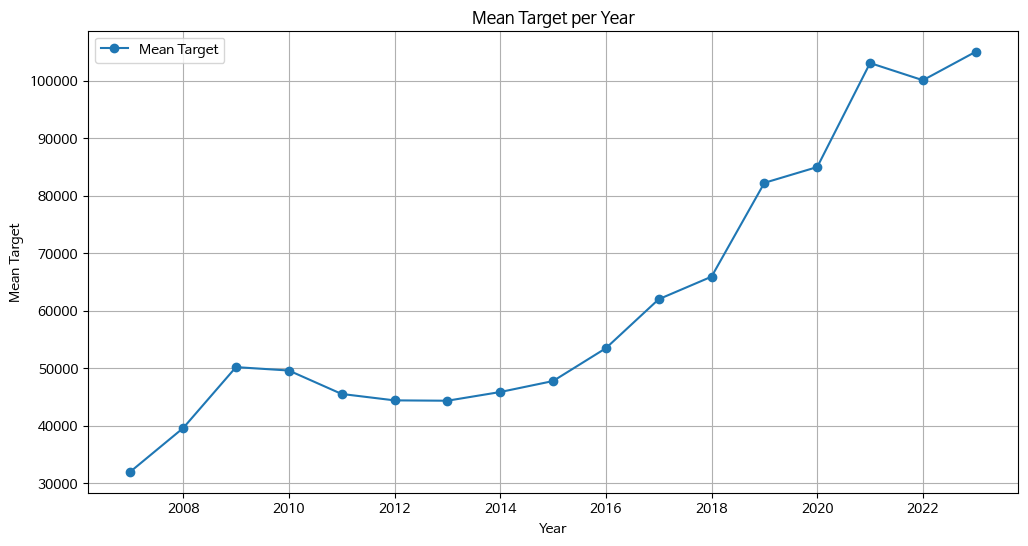

/home/pervinco/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


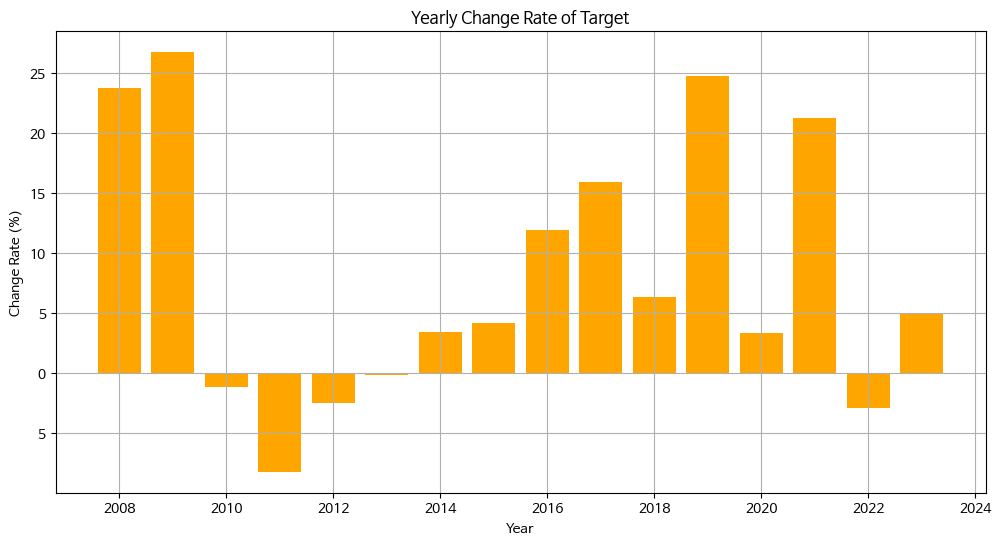

In [ ]:
# 계약연도 컬럼 생성
train_df['계약연도'] = train_df['계약년월'].astype(str).str[:4].astype(int)

# 계약연도별 target의 평균 계산
yearly_mean_target = train_df.groupby('계약연도')['target'].mean()

# 계약연도별 target의 평균 변화율 계산
yearly_change = yearly_mean_target.pct_change().dropna() * 100

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(yearly_mean_target.index, yearly_mean_target, marker='o', label='Mean Target')
plt.title('Mean Target per Year')
plt.xlabel('Year')
plt.ylabel('Mean Target')
plt.grid(True)
plt.legend()

plt.figure(figsize=(12, 6))
plt.bar(yearly_change.index, yearly_change, color='orange')
plt.title('Yearly Change Rate of Target')
plt.xlabel('Year')
plt.ylabel('Change Rate (%)')
plt.grid(True)

plt.show()

## 4-5.시군구와 target

결과를 보면 
- ```구```단위에서 강남구의 target은 평균값과 최대값이 최고값이지만 ```동```단위에서는 그렇지 않다.
-  ```구```단위로 봤을 때 소속된 ```동```별 target의 변동이 굉장히 크다. 이에 따라 지역성을 나타내는 변수들은 제거한다.
    - 시군구
    - 번지
    - 본번
    - 부번

In [ ]:
total_df['시군구'].value_counts()

시군구
서울특별시 노원구 상계동      45232
서울특별시 노원구 중계동      26524
서울특별시 양천구 신정동      23768
서울특별시 도봉구 창동       23222
서울특별시 구로구 구로동      22941
                   ...  
서울특별시 성북구 안암동5가        6
서울특별시 용산구 주성동          5
서울특별시 종로구 연지동          4
서울특별시 마포구 구수동          3
서울특별시 중구 입정동           3
Name: count, Length: 339, dtype: int64

In [ ]:
total_df[['시', '구', '동']] = total_df['시군구'].str.split(' ', expand=True)

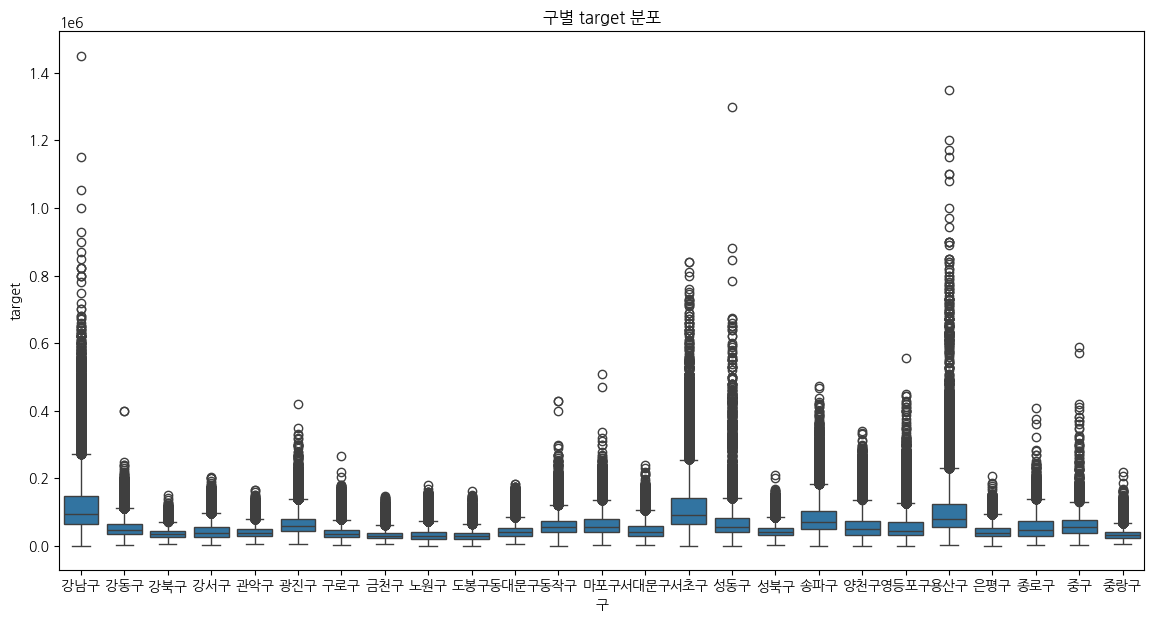

In [ ]:
# 구별 target 분포 시각화
plt.figure(figsize=(14, 7))
sns.boxplot(data=total_df, x='구', y='target')
plt.title('구별 target 분포')
plt.show()

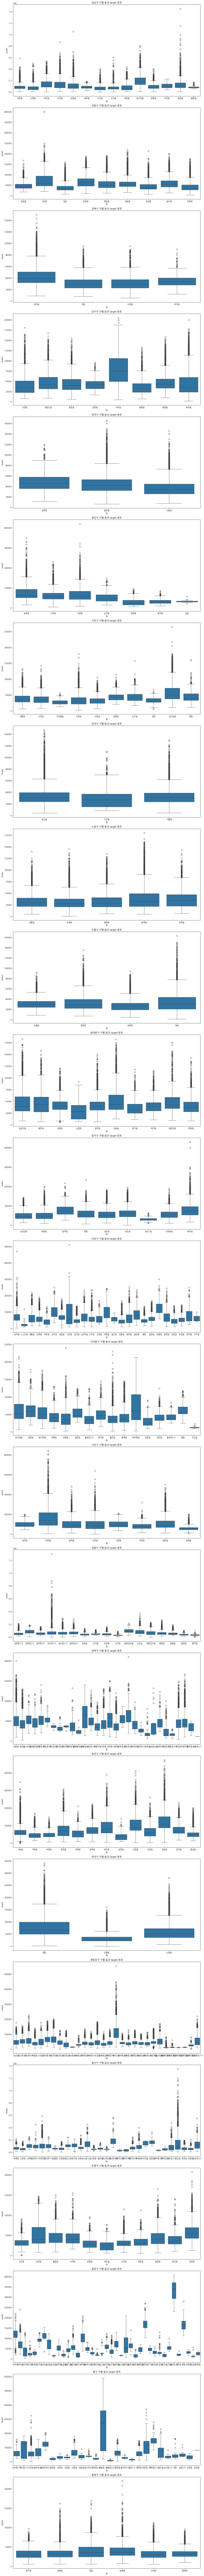

In [ ]:
# 구별로 그룹핑
gu_groups = total_df.groupby('구')

n_gu = gu_groups.ngroups
fig, axes = plt.subplots(nrows=n_gu, figsize=(14, 7*n_gu))

# 각 구별로 동별 target 분포 시각화
for ax, (gu, group) in zip(axes, gu_groups):
    sns.boxplot(data=group, x='동', y='target', ax=ax)
    ax.set_title(f'{gu} 구별 동과 target 분포')
    ax.set_xlabel('동')
    ax.set_ylabel('target')

plt.tight_layout()
plt.show()

In [ ]:
# '시군구'별 'target'의 평균 계산
average_target_by_gu = total_df.groupby('구')['target'].mean()
sorted_average_target = average_target_by_gu.sort_values(ascending=False)
print(sorted_average_target)

구
강남구     114847.461503
서초구     113608.653390
용산구     105876.961900
송파구      83868.032920
성동구      68924.389400
광진구      67158.379293
마포구      64445.226137
중구       62084.985733
동작구      60936.451058
양천구      59042.132927
종로구      57674.032963
영등포구     56137.342464
강동구      54402.872801
서대문구     49082.573688
동대문구     45194.761822
성북구      45117.779038
강서구      44215.453701
은평구      43721.691848
관악구      41954.133039
구로구      38605.012447
강북구      38316.975201
중랑구      35195.762819
노원구      33870.444730
금천구      33709.248647
도봉구      31924.613711
Name: target, dtype: float64


In [ ]:
# '구'별 'target'의 최대값
max_target_by_gu = total_df.groupby('구')['target'].mean()
sorted_max_target = max_target_by_gu.sort_values(ascending=False)
print(sorted_max_target)

구
강남구     114847.461503
서초구     113608.653390
용산구     105876.961900
송파구      83868.032920
성동구      68924.389400
광진구      67158.379293
마포구      64445.226137
중구       62084.985733
동작구      60936.451058
양천구      59042.132927
종로구      57674.032963
영등포구     56137.342464
강동구      54402.872801
서대문구     49082.573688
동대문구     45194.761822
성북구      45117.779038
강서구      44215.453701
은평구      43721.691848
관악구      41954.133039
구로구      38605.012447
강북구      38316.975201
중랑구      35195.762819
노원구      33870.444730
금천구      33709.248647
도봉구      31924.613711
Name: target, dtype: float64


In [ ]:
# '동'별 'target'의 평균값.
average_target_by_dong = total_df.groupby('동')['target'].mean()
sorted_average_target = average_target_by_dong.sort_values(ascending=False)
print(sorted_average_target)

동
신문로2가     329833.333333
장충동1가     255131.818182
압구정동      203222.949968
용산동5가     188139.910569
홍파동       170336.419753
              ...      
영등포동4가     13926.136364
미근동        13084.848485
영등포동3가     11530.827068
안암동5가      11300.000000
장충동2가       8530.128205
Name: target, Length: 337, dtype: float64


In [ ]:
# '동'별 'target'의 최대값.
max_target_by_dong = total_df.groupby('동')['target'].max()
sorted_max_target = max_target_by_dong.sort_values(ascending=False)
print(sorted_max_target)

동
청담동       1450000.0
한남동       1350000.0
성수동1가     1300000.0
삼성동       1053000.0
도곡동        870000.0
            ...    
누상동         19000.0
당산동6가       17900.0
영등포동4가      16500.0
영등포동3가      13500.0
안암동5가       11300.0
Name: target, Length: 337, dtype: float64


## 4-6.층과 target

- 굉장히 고층임에도 가격은 최고점이 아니다.
- 오히려 가격의 고점들은 ```0초과~10미만``` 구간에 분포하고 있는데 이는 다음과 같이 주관적으로 해석
    1. 초고층 건물보다 일반적인 아파트의 수가 더 많다.
    2. 초고층에 사는 사람보다 일반적인 아파트에 사는 사람의 수가 더 많다.
    3. 1층이나 2층과 같은 저층은 지나다니는 사람이 집 내부를 볼 수 있으며 10층 이상의 고층은 사건사고나 엘리베이터 소요시간 등에 있어 선호도가 낮을 것으로 예상.

0.1531757171538661


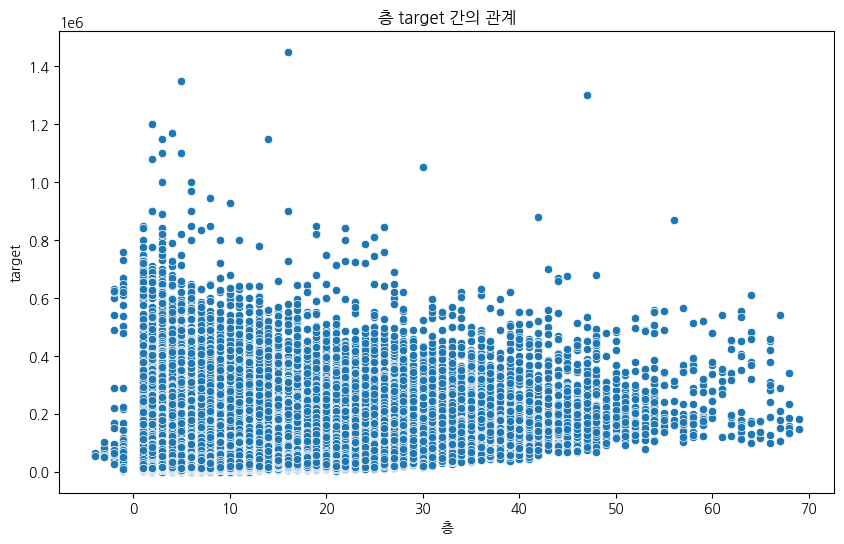

In [ ]:
corr_floor = total_df['층'].corr(total_df['target'])
print(corr_floor)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='층', y='target', data=total_df)
plt.title('층 target 간의 관계')
plt.show()

## 4-7.건축년도와 target

- 오래된 아파트임에도 target의 중간값에 위치한 부동산들이 존재.(한국에서 부동산은 투자종목이기 때문일까??)
- 1989년부터 1995년까지 대체로 target이 낮은 구간 존재.
- 1996년부터 2011년까지는 우상향하다가 2012년부터 급락. 이후 2020년부터는 급등.

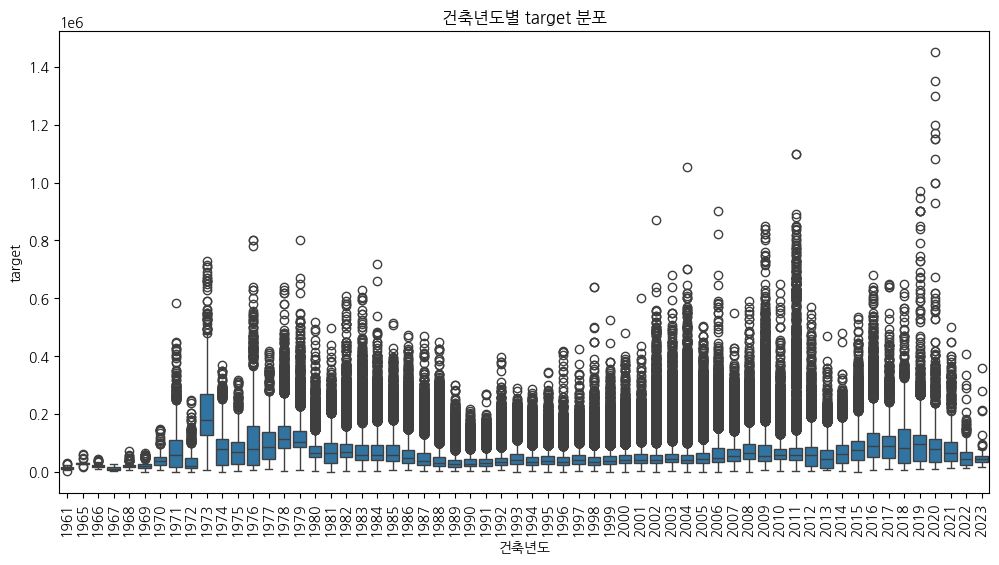

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='건축년도', y='target', data=total_df)
plt.xticks(rotation=90)
plt.title('건축년도별 target 분포')
plt.show()

## 4-8.주차대수와 target

결측치도 많고 분포상으로도 특별한 결론을 도출하기 어렵다. 다만 전체세대수와 연계해서 ```세대별 주차대수```라는 파생변수를 만들어 활용할 수 있을듯.

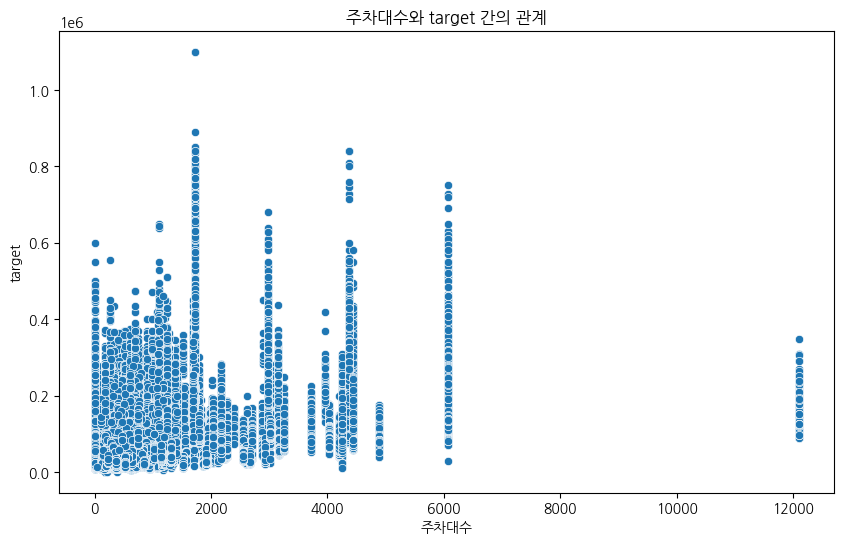

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='주차대수', y='target', data=total_df)
plt.title('주차대수와 target 간의 관계')
plt.show()

0.3618077574727823


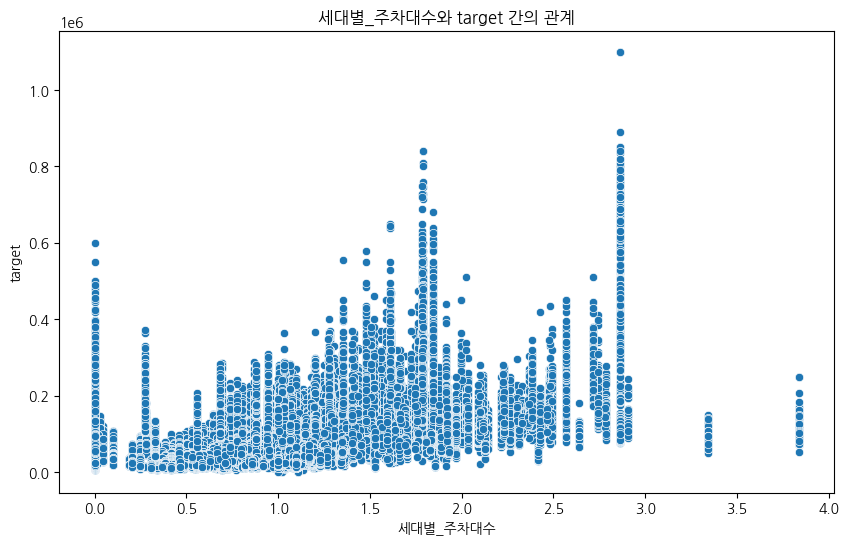

In [ ]:
total_df['세대별_주차대수'] = total_df['주차대수'] / total_df['전체세대수']

corr_h_parking = total_df['세대별_주차대수'].corr(total_df['target'])
print(corr_h_parking)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='세대별_주차대수', y='target', data=total_df)
plt.title('세대별_주차대수와 target 간의 관계')
plt.show()

## 4-9.건설사와 target

아파트의 경우 건설사에 따라 브랜드가 부여되기도 하며 이는 명품처럼 프리미엄값이 부가된다. 따라서 활용하면 좋을 것 같지만 결측치가 너무너무 많다...

In [ ]:
print(total_df.columns)

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지분류', '전화번호', '팩스번호',
       '단지소개기존clob', '세대타입_분양형태', '관리방식', '복도유형', '난방방식', '전체동수', '전체세대수',
       '건설사_시공사', '시행사', '사용검사일-사용승인일', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황_60m이하', '전용면적별세대현황_60m~85m이하', '85m~135m이하', '135m초과',
       '홈페이지', '등록일자', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타의무임대임의', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일',
       'target', 'is_test', 'addr', 'x', 'y', '계약년', '계약월', '시', '구', '동',
       '세대별_주차대수'],
      dtype='object')


In [ ]:
print(total_df["건설사_시공사"].unique())
print(total_df["건설사_시공사"].value_counts())

['우성건설' '박연정' '대한주택공사' '현대건설(주)' '동양고속건설주식회사' '대우건설' '대림산업(주)' '삼성물산' nan
 '삼성물산주식회사' '현대,쌍용,GS' '쌍용건설(주)' '현대산업개발' '한보' '삼성중공업' '대성산업' '중앙건설'
 '세방기업' '태영건설' '신동아' '신동아건설' '고려개발(주)' '대우건설,대림산업,태영건설' '한라, 두진'
 '고려산업개발(주)' '삼성건설' '롯데건설' 'GS건설' '(주)한화건설' '한신공영' '(주)건영,삼익주택,라이프주택'
 '계룡건설산업(주)' '한양수자인' '건영종합건설(주)' '청담삼익아파트' '계룡건설(주)' '삼환기업' '한신공영(주)'
 'KR산업' '동부건설' '고속도로관리공단' '동부건설(주)외1' 'SH공사' '남광, 대우' 'sh공사' '청광종합건설(주)'
 '중앙건설(주)' 'LG건설' '신동아건설(주)' '현대산업개발(주)' '(주)청구주택' '삼호건설' '(주)삼호' '한솔건설'
 '현대,대림' '신동아 건설(주)' '임광토건(주)' '롯데건설(주)' '벽산건설' '동부건설(주)' '현대 성우건설'
 '홍익종합건업(주)' '한양주택 (주)' '한진중공업(주)' '성지건설' '남광토건(주)' 'gs건설'
 '신명건설,신원건설,미주건설' 'KCC' '두산, 이수건설' '두산건설' 'TEC건설' '현대건설,현대산업개발,한진중공업'
 '성원건설(주)' '라인건설' '코오롱글로벌(주)' '금호건설' '(주)대보건설' '(주)한양' '경남기업' '에스에이치공사'
 '금호' '(주)서광건설산업' '우림건설(주)' '중앙하이츠' '청구' '우림건설' '삼환, 삼익건설' '(주)현대건설'
 '(주)쌍용건설' '삼성건설(주)' '보람건설(주)' '한화건설' '현대건설' '한일건설' '주식회사 서희건설'
 '대호아이피종합건설' '라이프건설' '갑을건설' '대우건설(주)' '현대건설주식회사' 'SK건설' '우성건설(주)' '고려산업개발'
 '인정건설(주)' '인정건설' '(주)우성건설' '

## 4-10.전용면적별세대현황

1. 결측치와 이상치가 너무 많다.
2. 부동산 가격은 내가 구매할 전용면적과 계약하는 시점의 환경요인에 큰 영향을 받는다고 생각. 즉, 해당 아파트가 어떤 평수들의 세대들을 갖고 있는지는 별로 중요하지 않은듯.

이러한 이유로 삭제.

In [ ]:
total_df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지분류', '전화번호', '팩스번호',
       '단지소개기존clob', '세대타입_분양형태', '관리방식', '복도유형', '난방방식', '전체동수', '전체세대수',
       '건설사_시공사', '시행사', '사용검사일-사용승인일', '연면적', '주거전용면적', '관리비부과면적',
       '전용면적별세대현황_60m이하', '전용면적별세대현황_60m~85m이하', '85m~135m이하', '135m초과',
       '홈페이지', '등록일자', '수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타의무임대임의', '단지승인일', '사용허가여부', '관리비 업로드', '단지신청일',
       'target', 'is_test', 'addr', 'x', 'y', '계약년', '계약월', '시', '구', '동',
       '세대별_주차대수'],
      dtype='object')

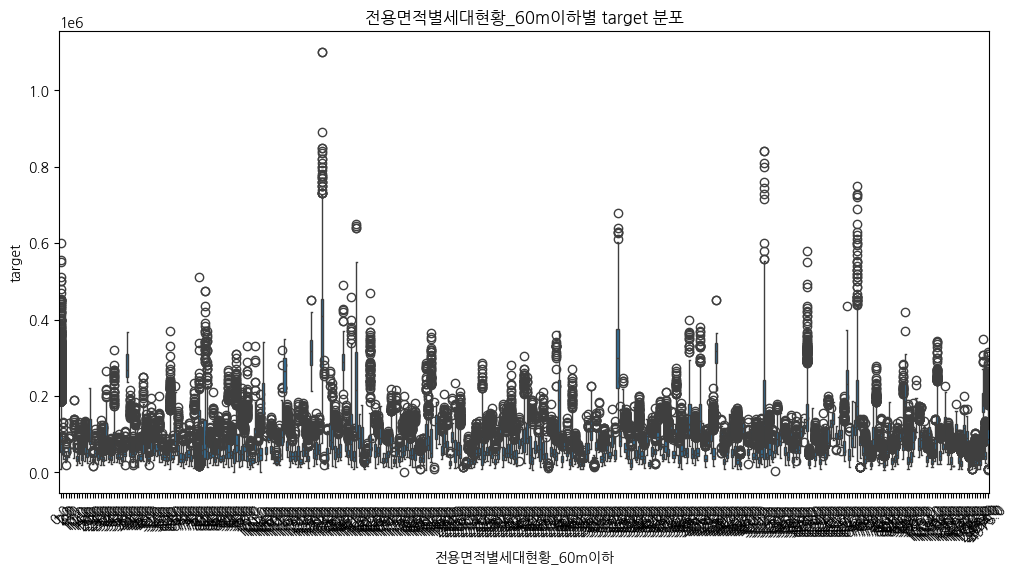

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='전용면적별세대현황_60m이하', y='target', data=total_df)
plt.xticks(rotation=45)
plt.title('전용면적별세대현황_60m이하별 target 분포')
plt.show()

## 4-11.해제사유발생일

- 처음에는 해당 부동산에서 해제사유발생일이 많을수록 하자가 존재해 사람들이 계약을 해지하는 것이라 생각해 중요할 것이라 생각했으나 이상치가 너무 많음. 따라서 해제사유발생일이 존재하는 경우를 나타내는 ```해제사유발생여부``` 파생변수를 생성
- 등기신청일자도 마찬가지.

In [ ]:
total_df['해제사유발생여부'] = pd.notnull(total_df['해제사유발생일']).astype(int)
print(total_df[['해제사유발생여부']])

         해제사유발생여부
0               0
1               0
2               0
3               0
4               0
...           ...
1128089         1
1128090         0
1128091         0
1128092         0
1128093         0

[1128094 rows x 1 columns]


In [ ]:
total_df['등기신청일자여부'] = pd.notnull(total_df['등기신청일자']).astype(int)
print(total_df[['등기신청일자여부']])

         등기신청일자여부
0               0
1               0
2               0
3               0
4               0
...           ...
1128089         0
1128090         0
1128091         0
1128092         0
1128093         1

[1128094 rows x 1 columns]
